In [7]:
from os.path import join as pjoin
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Bug!

Accuracies are consistently below chance (across all tested k). 

**I must have done something wrong**

In [10]:
results_path = '/data/BnB_USER/oliver/somato/scratch/digit_classification'
ks = [3,5,10,20,50,100, 200]
npy_files = [
    pjoin(results_path, 'accuracies_k%i.npy' % k)
    for k in ks]
print(npy_files)

['/data/BnB_USER/oliver/somato/scratch/digit_classification/accuracies_k3.npy', '/data/BnB_USER/oliver/somato/scratch/digit_classification/accuracies_k5.npy', '/data/BnB_USER/oliver/somato/scratch/digit_classification/accuracies_k10.npy', '/data/BnB_USER/oliver/somato/scratch/digit_classification/accuracies_k20.npy', '/data/BnB_USER/oliver/somato/scratch/digit_classification/accuracies_k50.npy', '/data/BnB_USER/oliver/somato/scratch/digit_classification/accuracies_k100.npy', '/data/BnB_USER/oliver/somato/scratch/digit_classification/accuracies_k200.npy']


In [29]:
# put results in one single data frame
dfs = []
for k, npy_file in zip(ks, npy_files):
    arr = np.load(npy_file)  # load npy file
    av_acc = np.average(arr, axis=0)  # average accuracies across runs
    df = pd.DataFrame()
    df['acc'] = av_acc
    df['k'] = k
    dfs.append(df)
df = pd.concat(dfs)

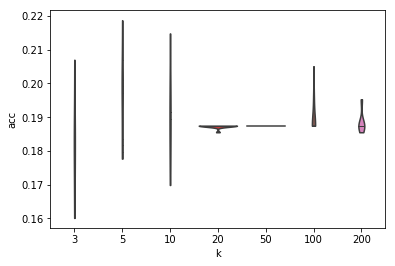

In [30]:
sns.violinplot(data=df, x='k', y='acc', inner="stick", cut=0)

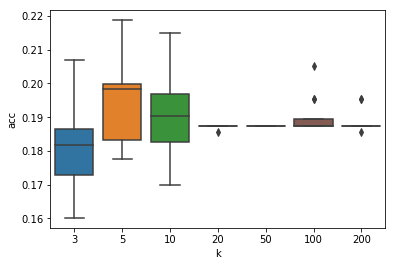

In [34]:
sns.boxplot(data=df, x='k', y='acc')

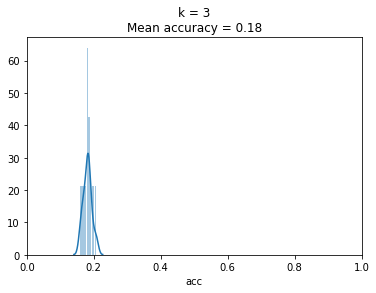

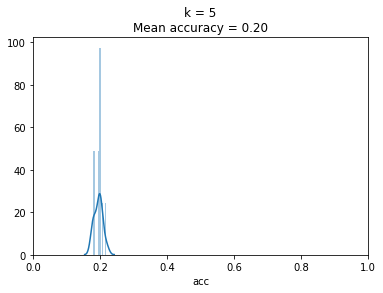

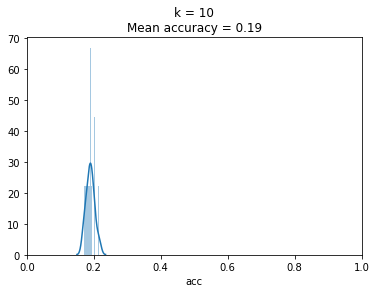

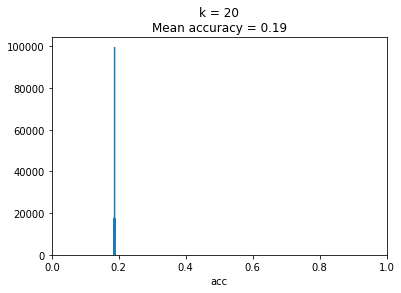

/data/BnB_USER/oliver/somato/raw/venvs/somato_env/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/data/BnB_USER/oliver/somato/raw/venvs/somato_env/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


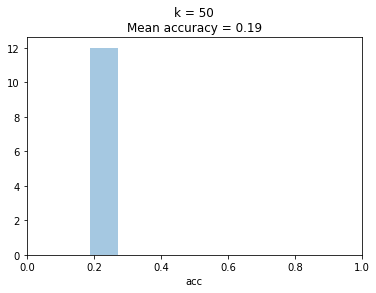

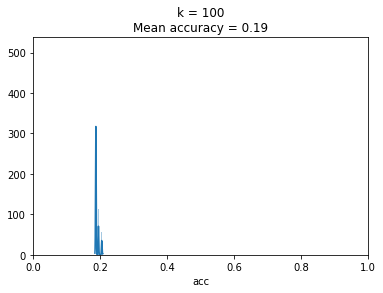

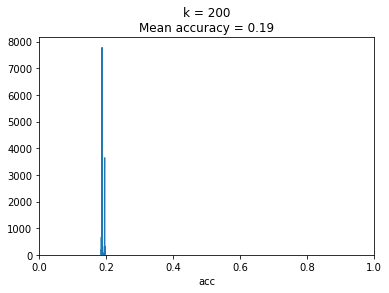

In [32]:
for k in ks:
    df_k = df[df['k']==k]
    g = sns.distplot(df_k['acc'], bins=12)
    g.set_title('k = %i\nMean accuracy = %.2f' %(k, np.mean(df_k['acc'])))
    g.set_xlim([0,1])
    plt.show()